In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv("D:/MajorProjectDocLab/Diabetes Classification.csv")

In [5]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         128 non-null    int64  
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  128 non-null    object 
 7   Smoking                     128 non-null    object 
 8   Diet                        128 non-null    object 
 9   Exercise                    128 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.1+ KB


In [7]:
df.describe()

,Age,BMI,FBS,HbA1c
count,128.000000,128.000000,128.000000,128.000000
mean,42.031250,35.359375,162.500000,7.887500
std,16.783915,14.981739,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,28.000000,24.000000,120.000000,6.400000
50%,40.000000,34.000000,160.000000,7.800000
75%,55.000000,45.500000,205.000000,9.375000
max,75.000000,67.000000,280.000000,12.000000


In [8]:
df.isna().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [9]:
def plots(df, x, y, axes, i):
    group = df.groupby(y)
    sns.histplot(df, x=x, ax=axes[i][0], kde=True, color='g')
    sns.histplot(df, x=x, hue=y, ax=axes[i][1], kde=True)
    sns.barplot(x=group[x].mean().index,
                y=group[x].mean(),
               ax=axes[i][2])
    
    for container in axes[i][2].containers:
        axes[i][2].bar_label(container, size=15, color='black')
        
    axes[i][3].pie(df[y].value_counts(),
                  labels = df[y].value_counts().index,
                  autopct='%0.2f%%')

In [10]:
def plot_class(df, y, nums):
    length = len(nums)
    fig, axes = plt.subplots(nrows=length, ncols=4, figsize=(25, 10))
    for i in range(length):
        plots(df,nums[i],y,axes,i)
        
    plt.suptitle("Histplots, barplots and pie charts grouped by {}".format(y),
                size=20)
        
    plt.tight_layout()
    plt.show()

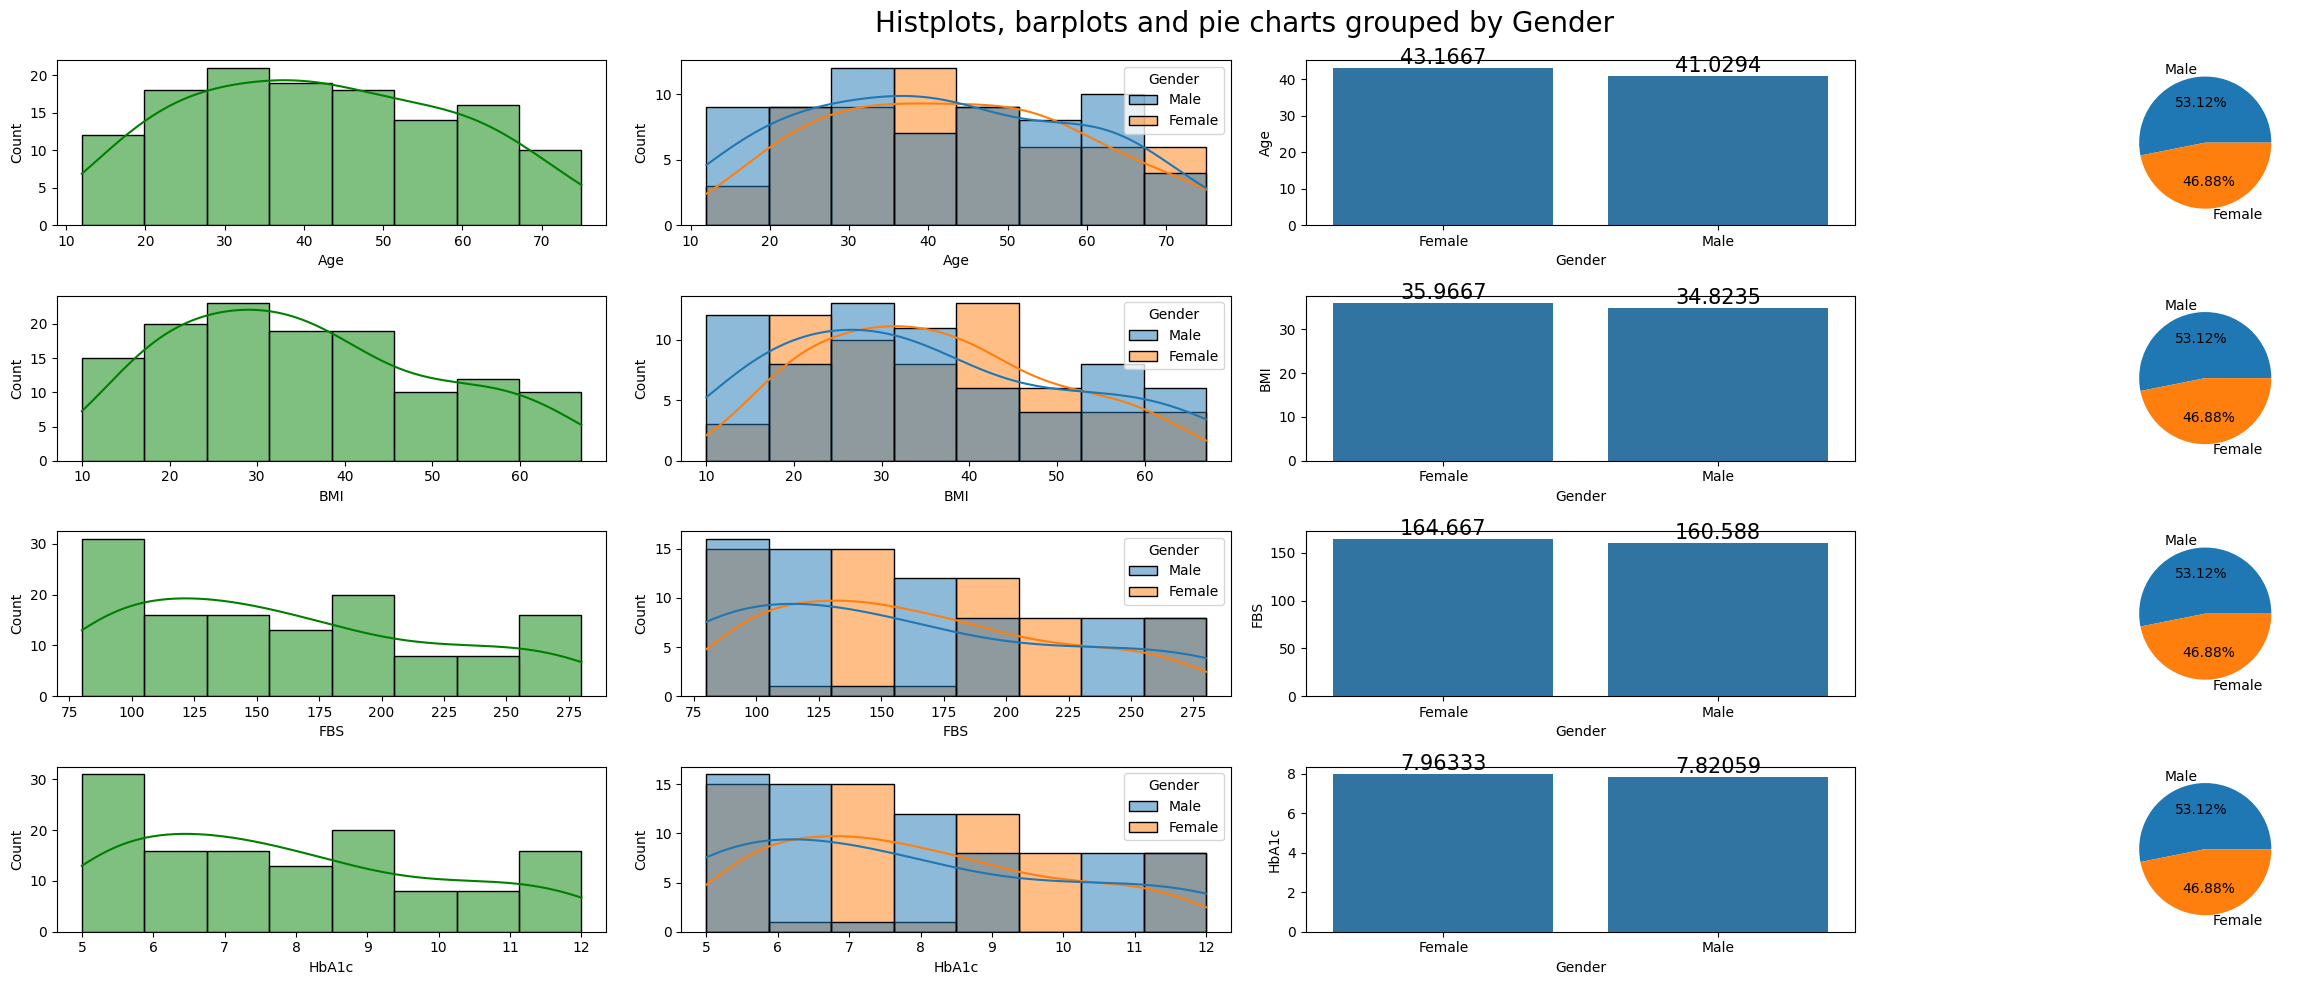

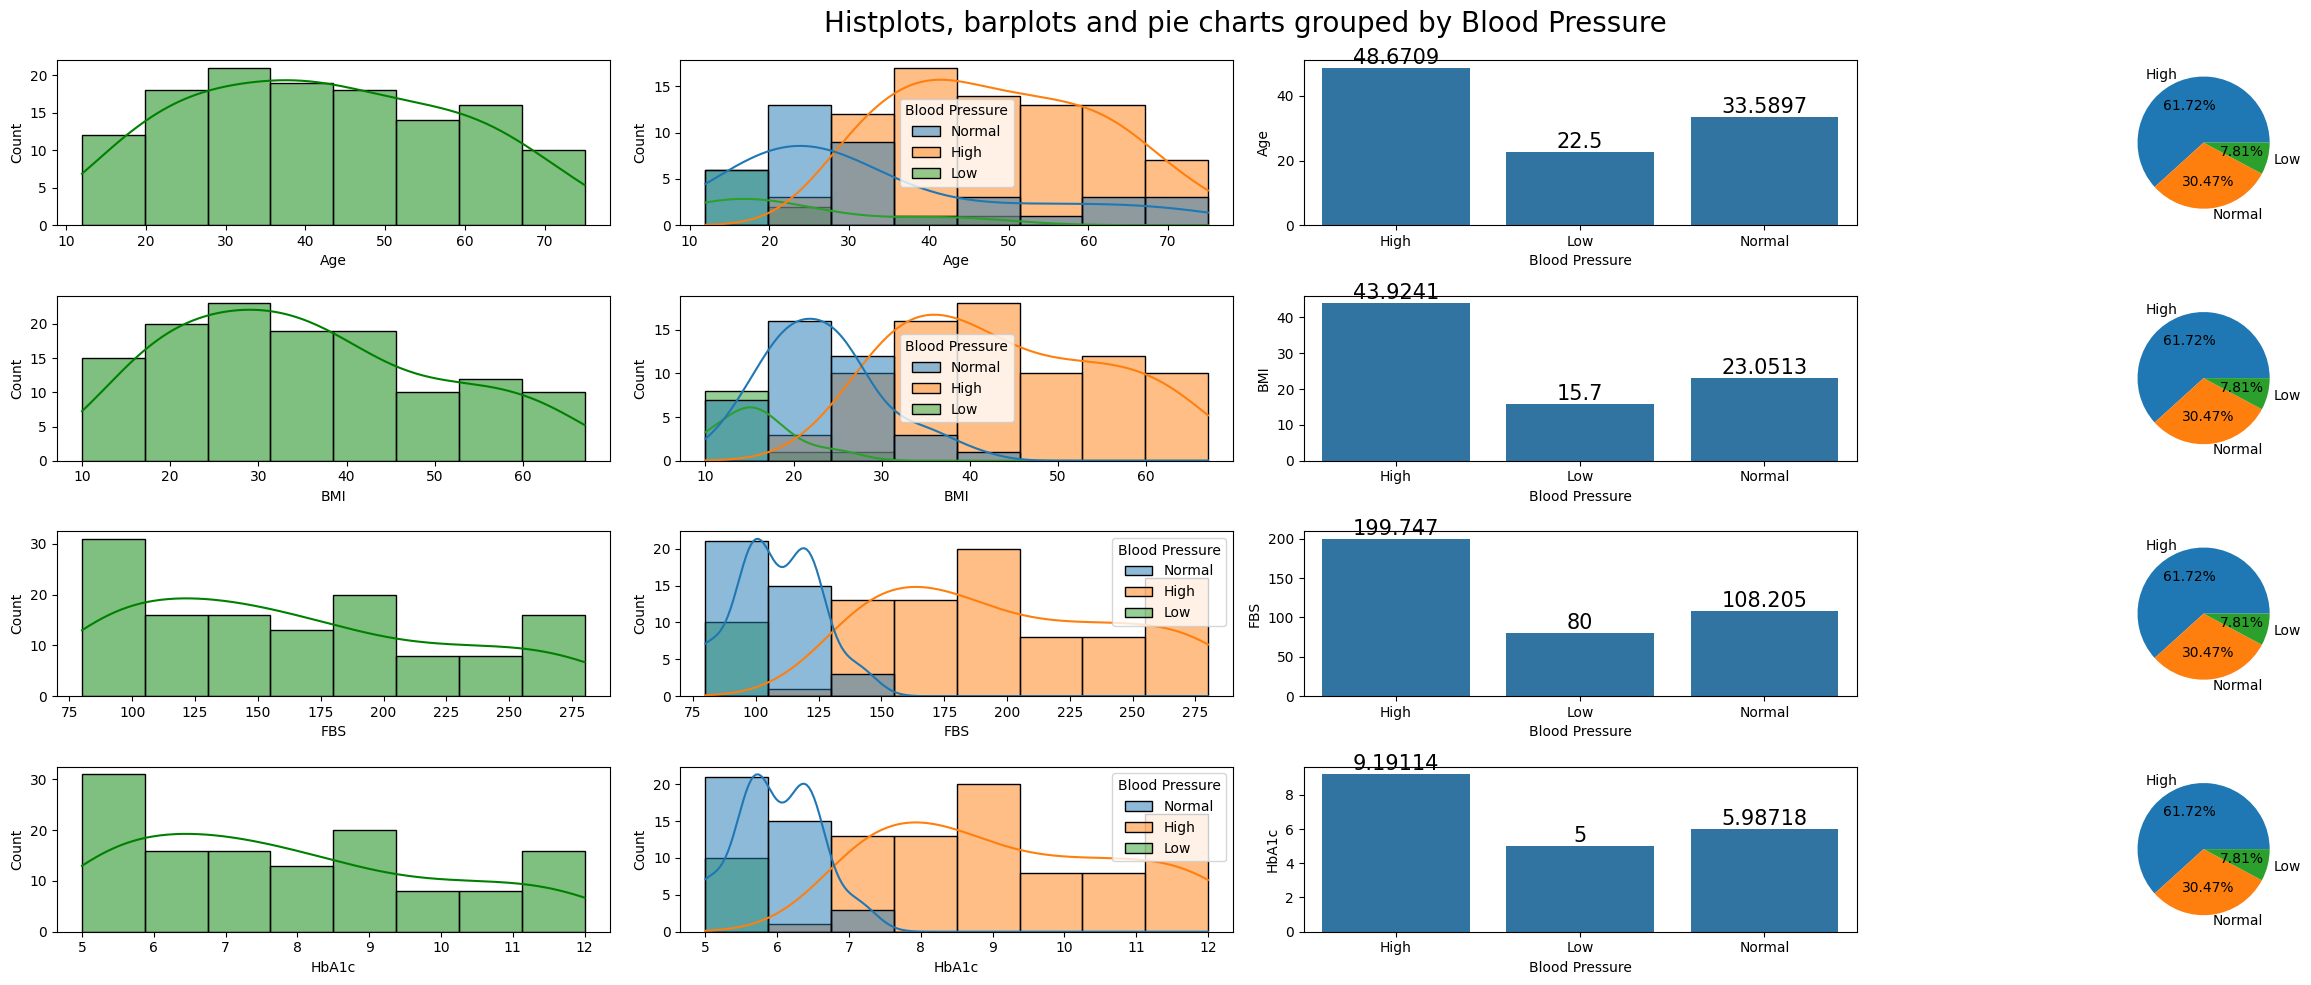

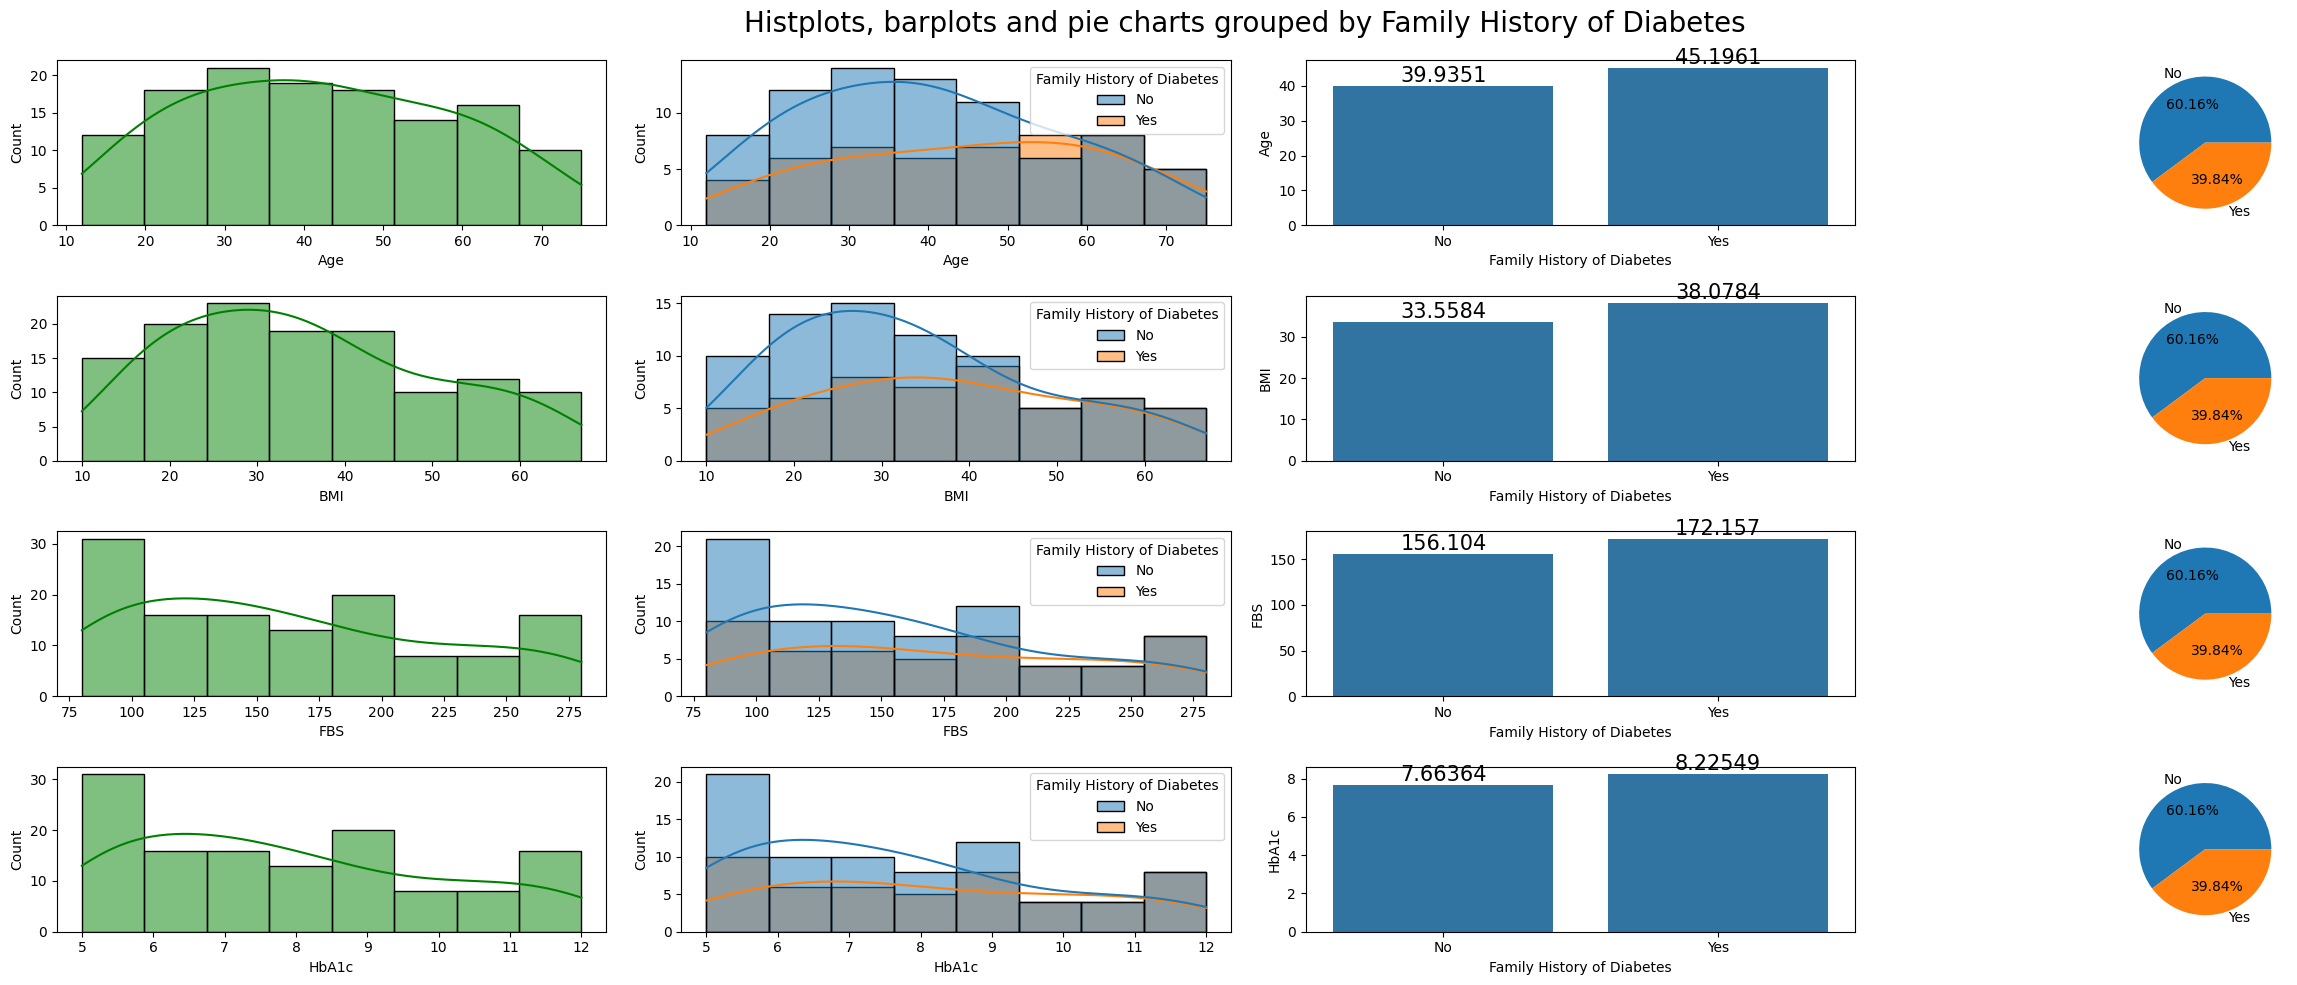

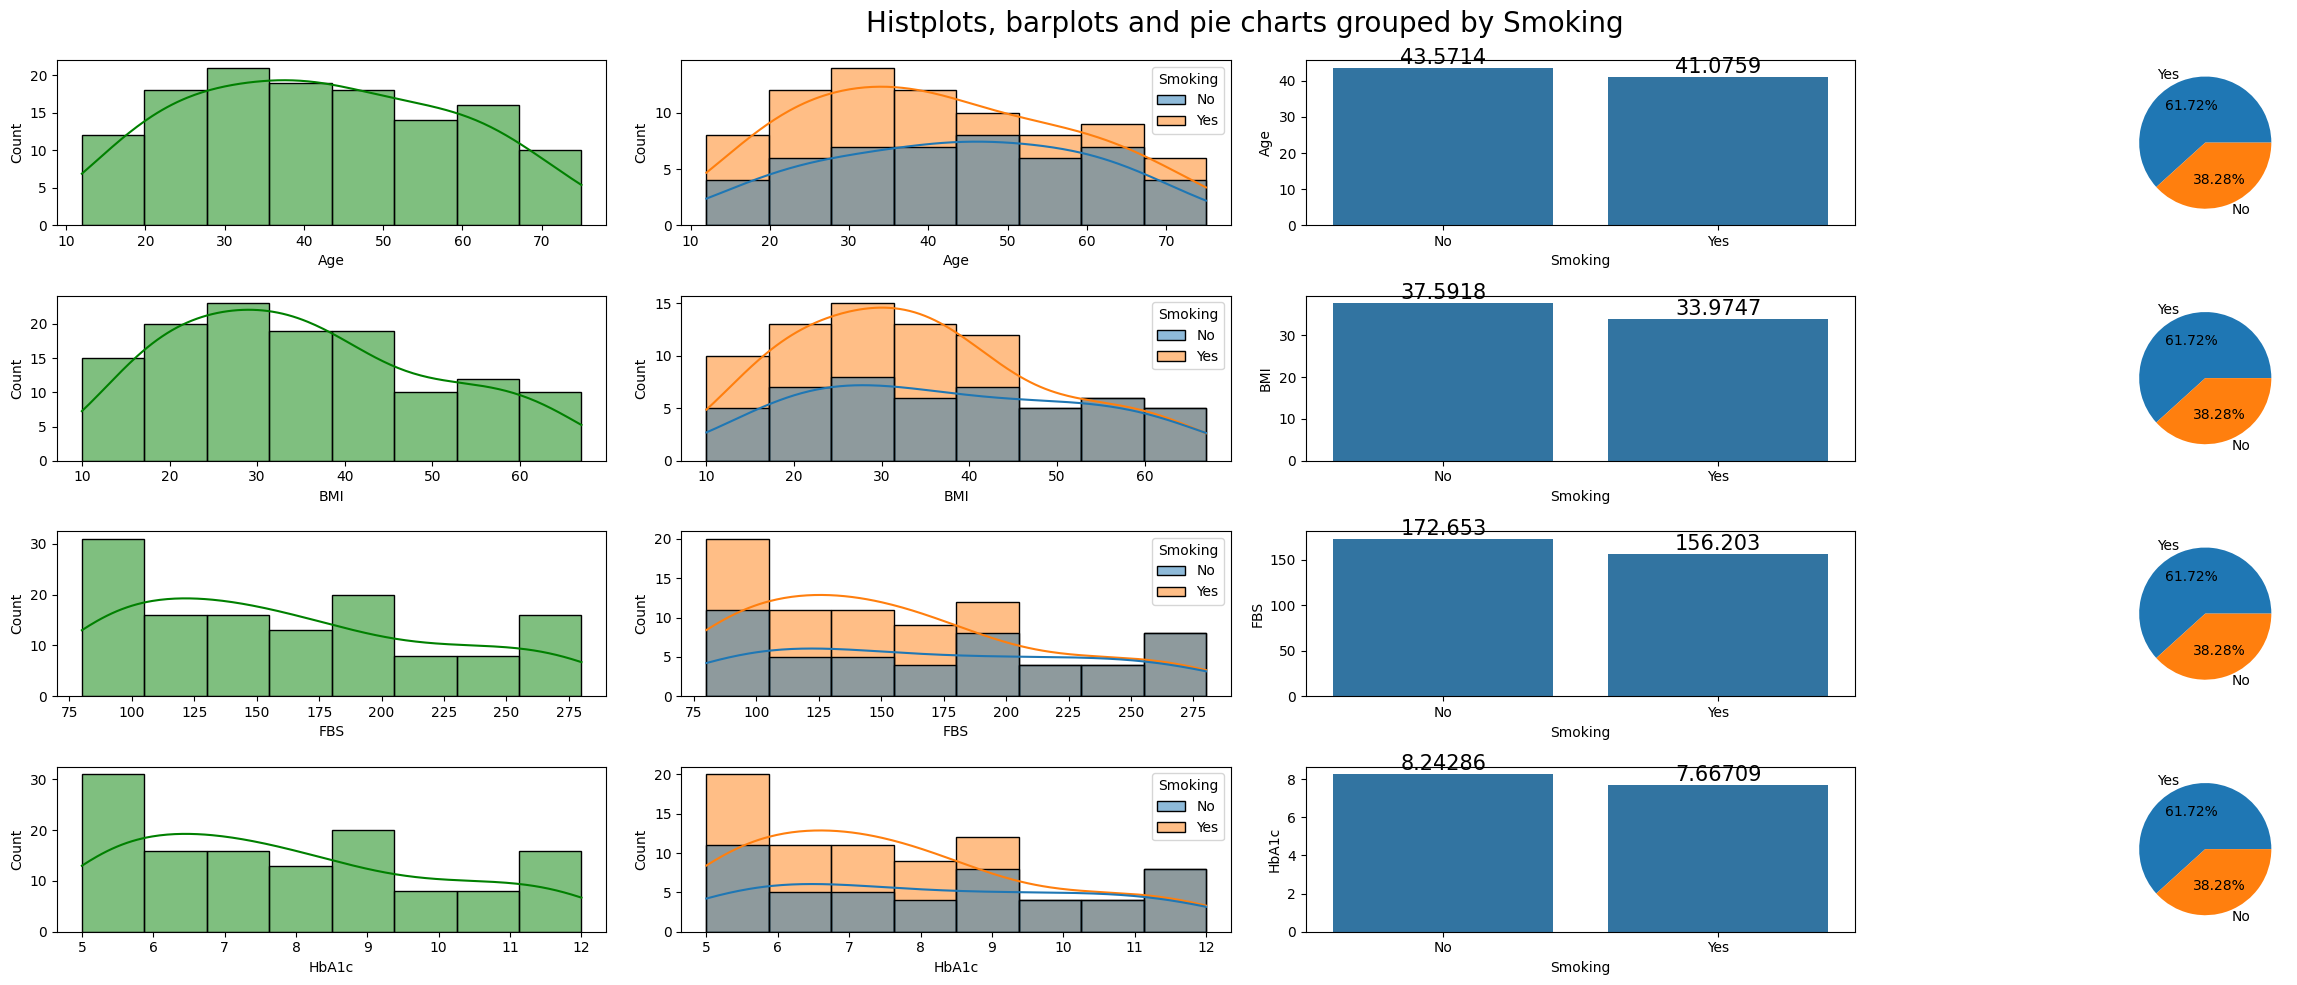

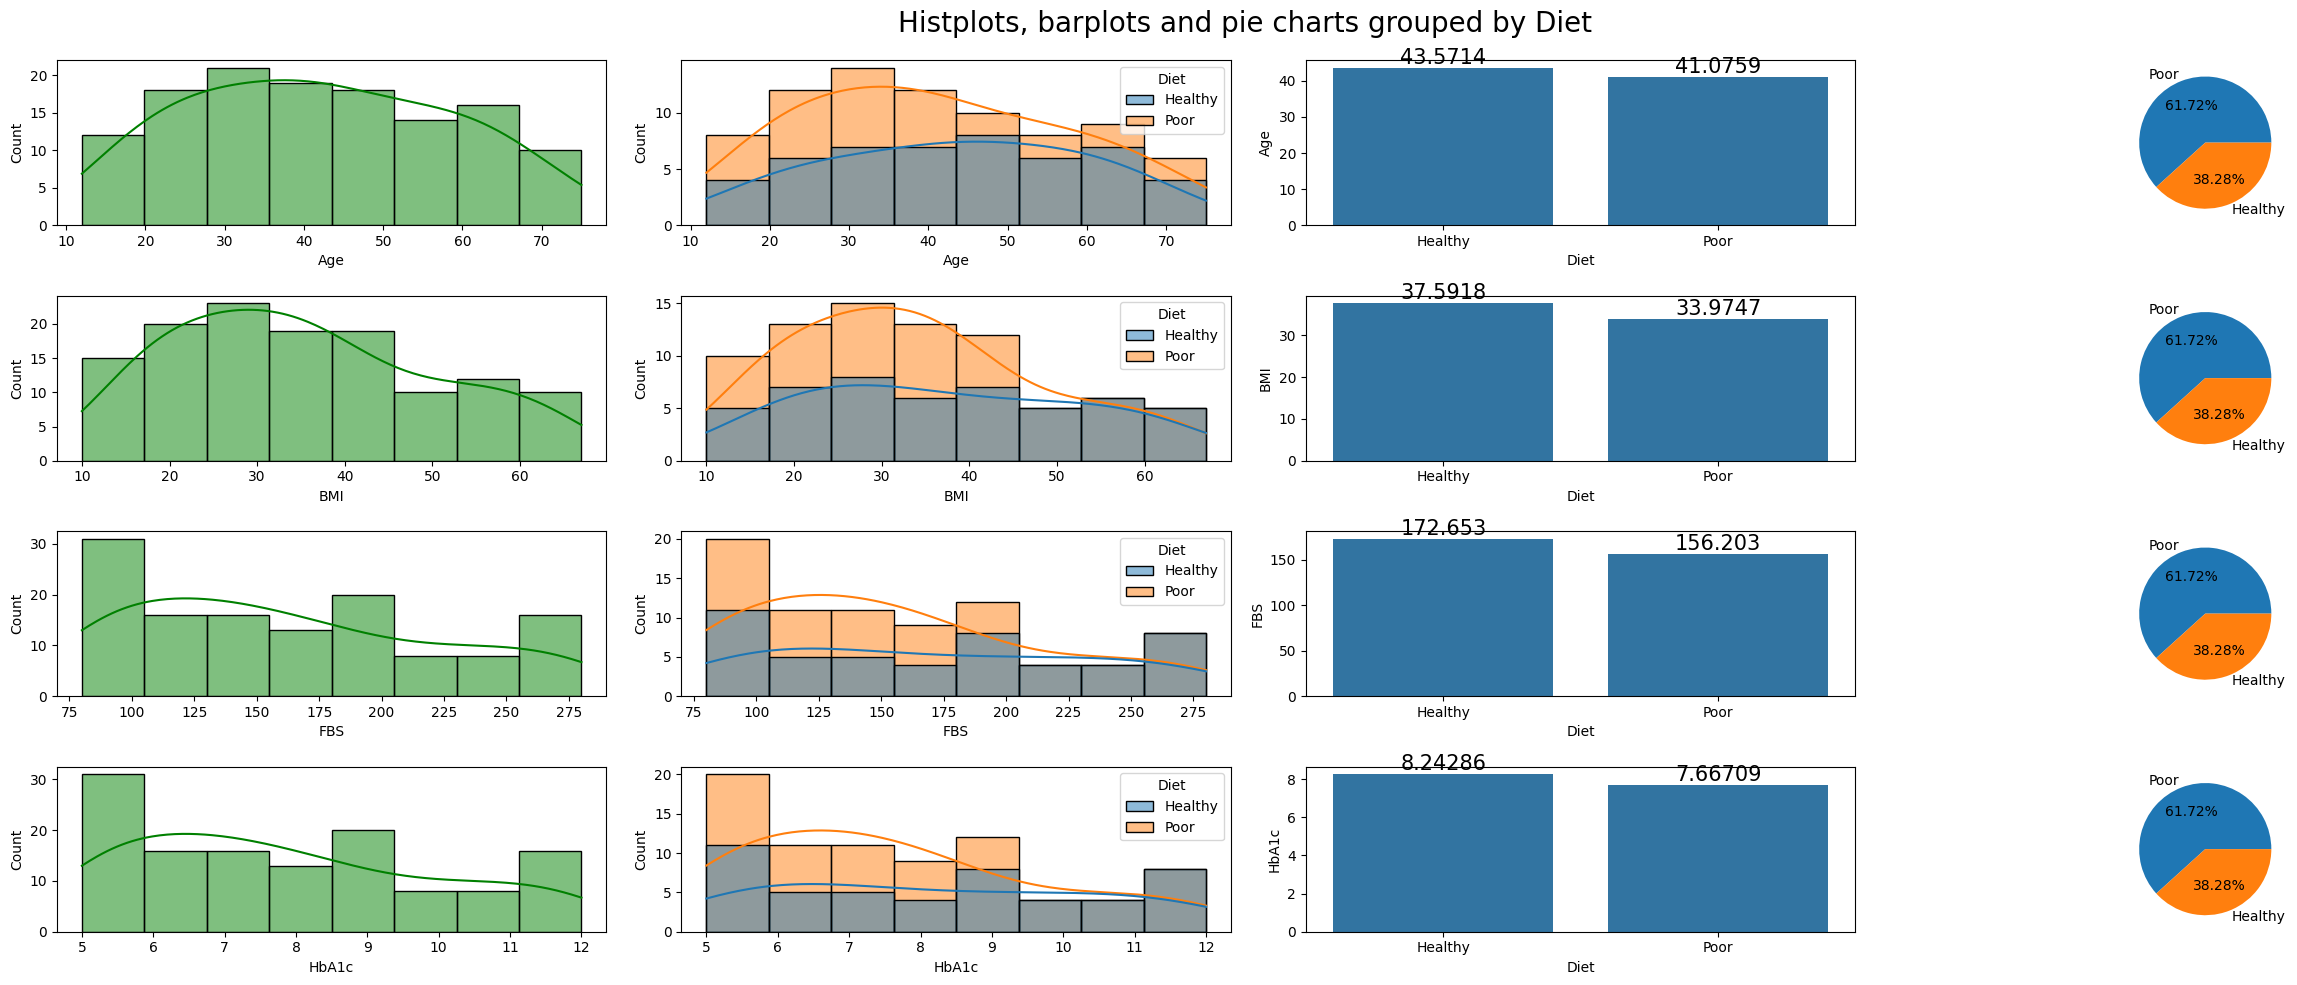

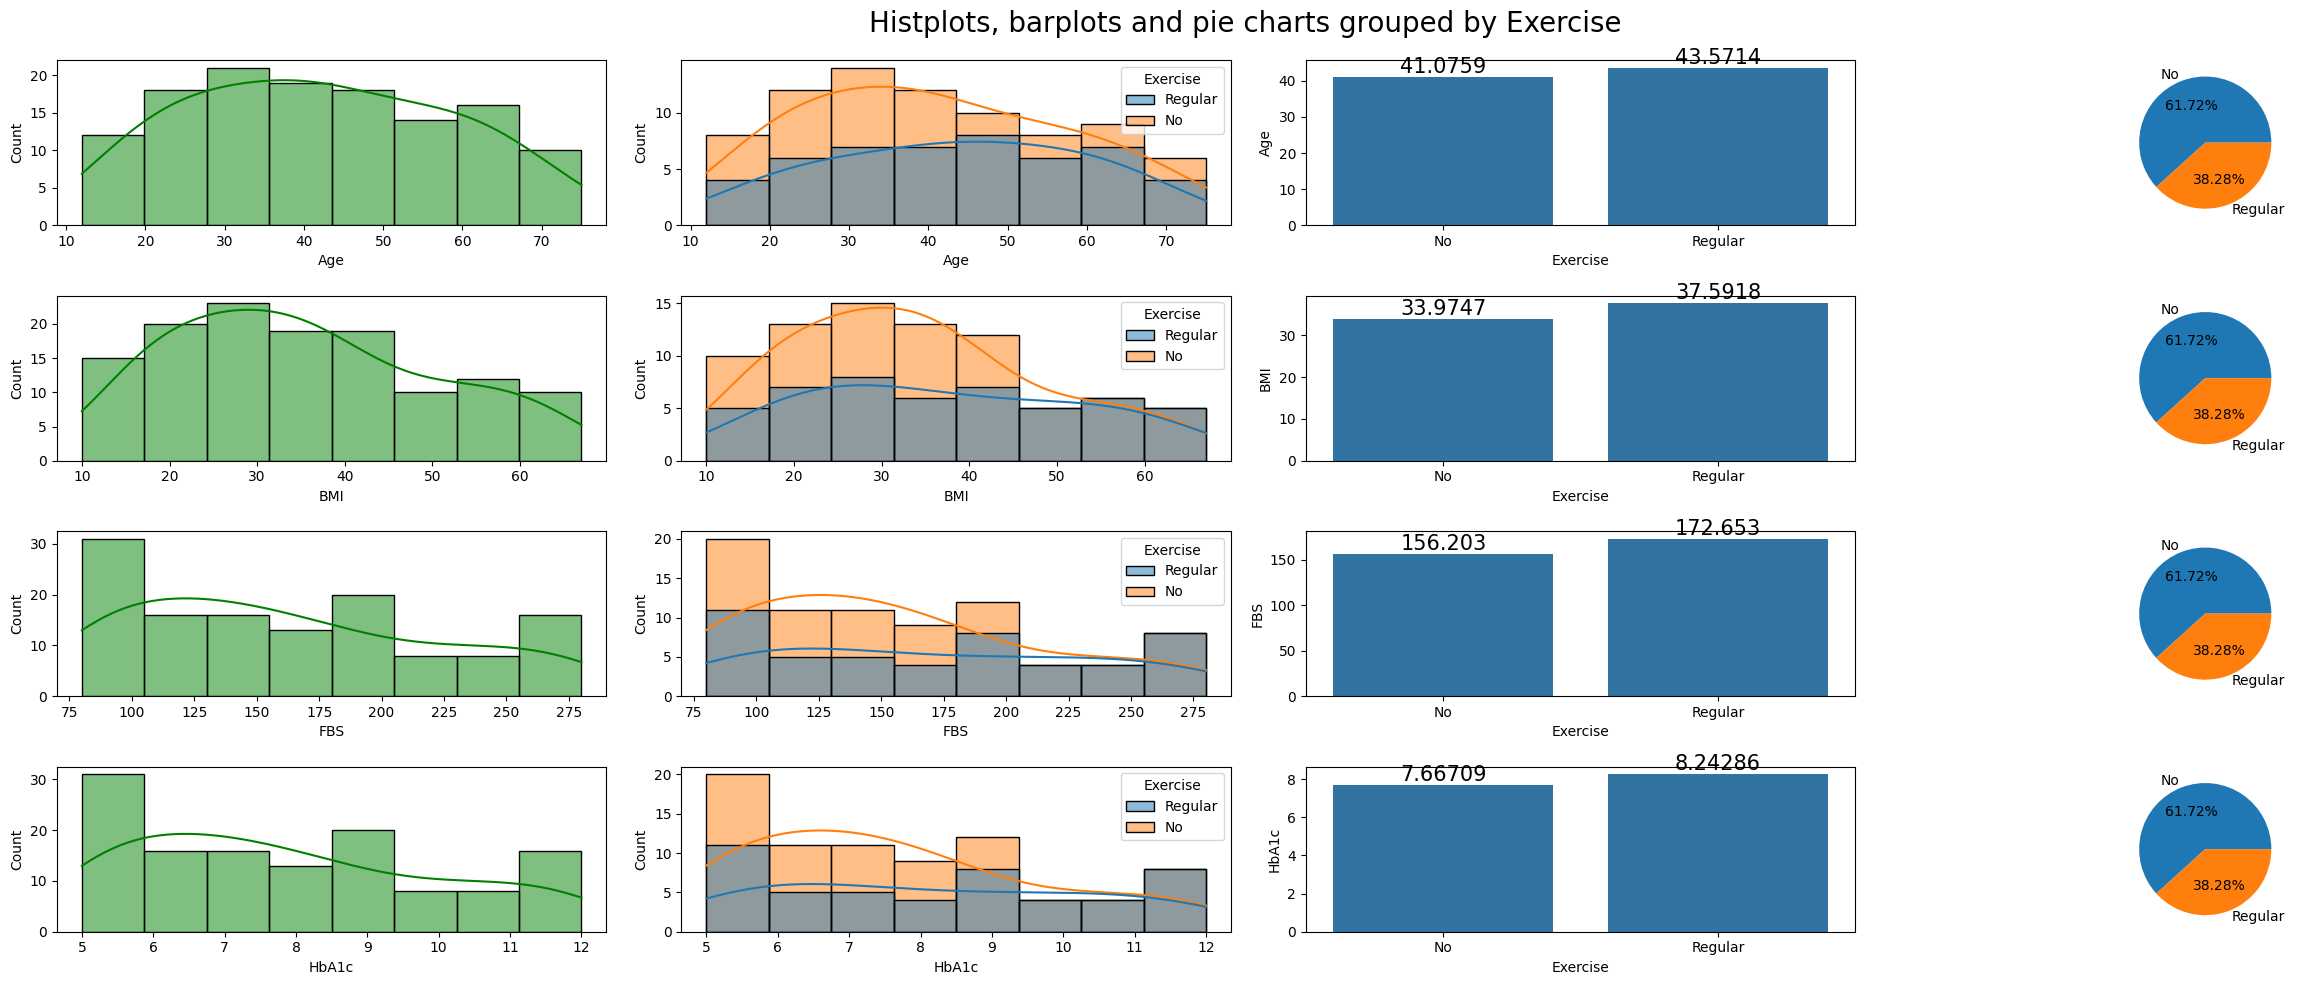

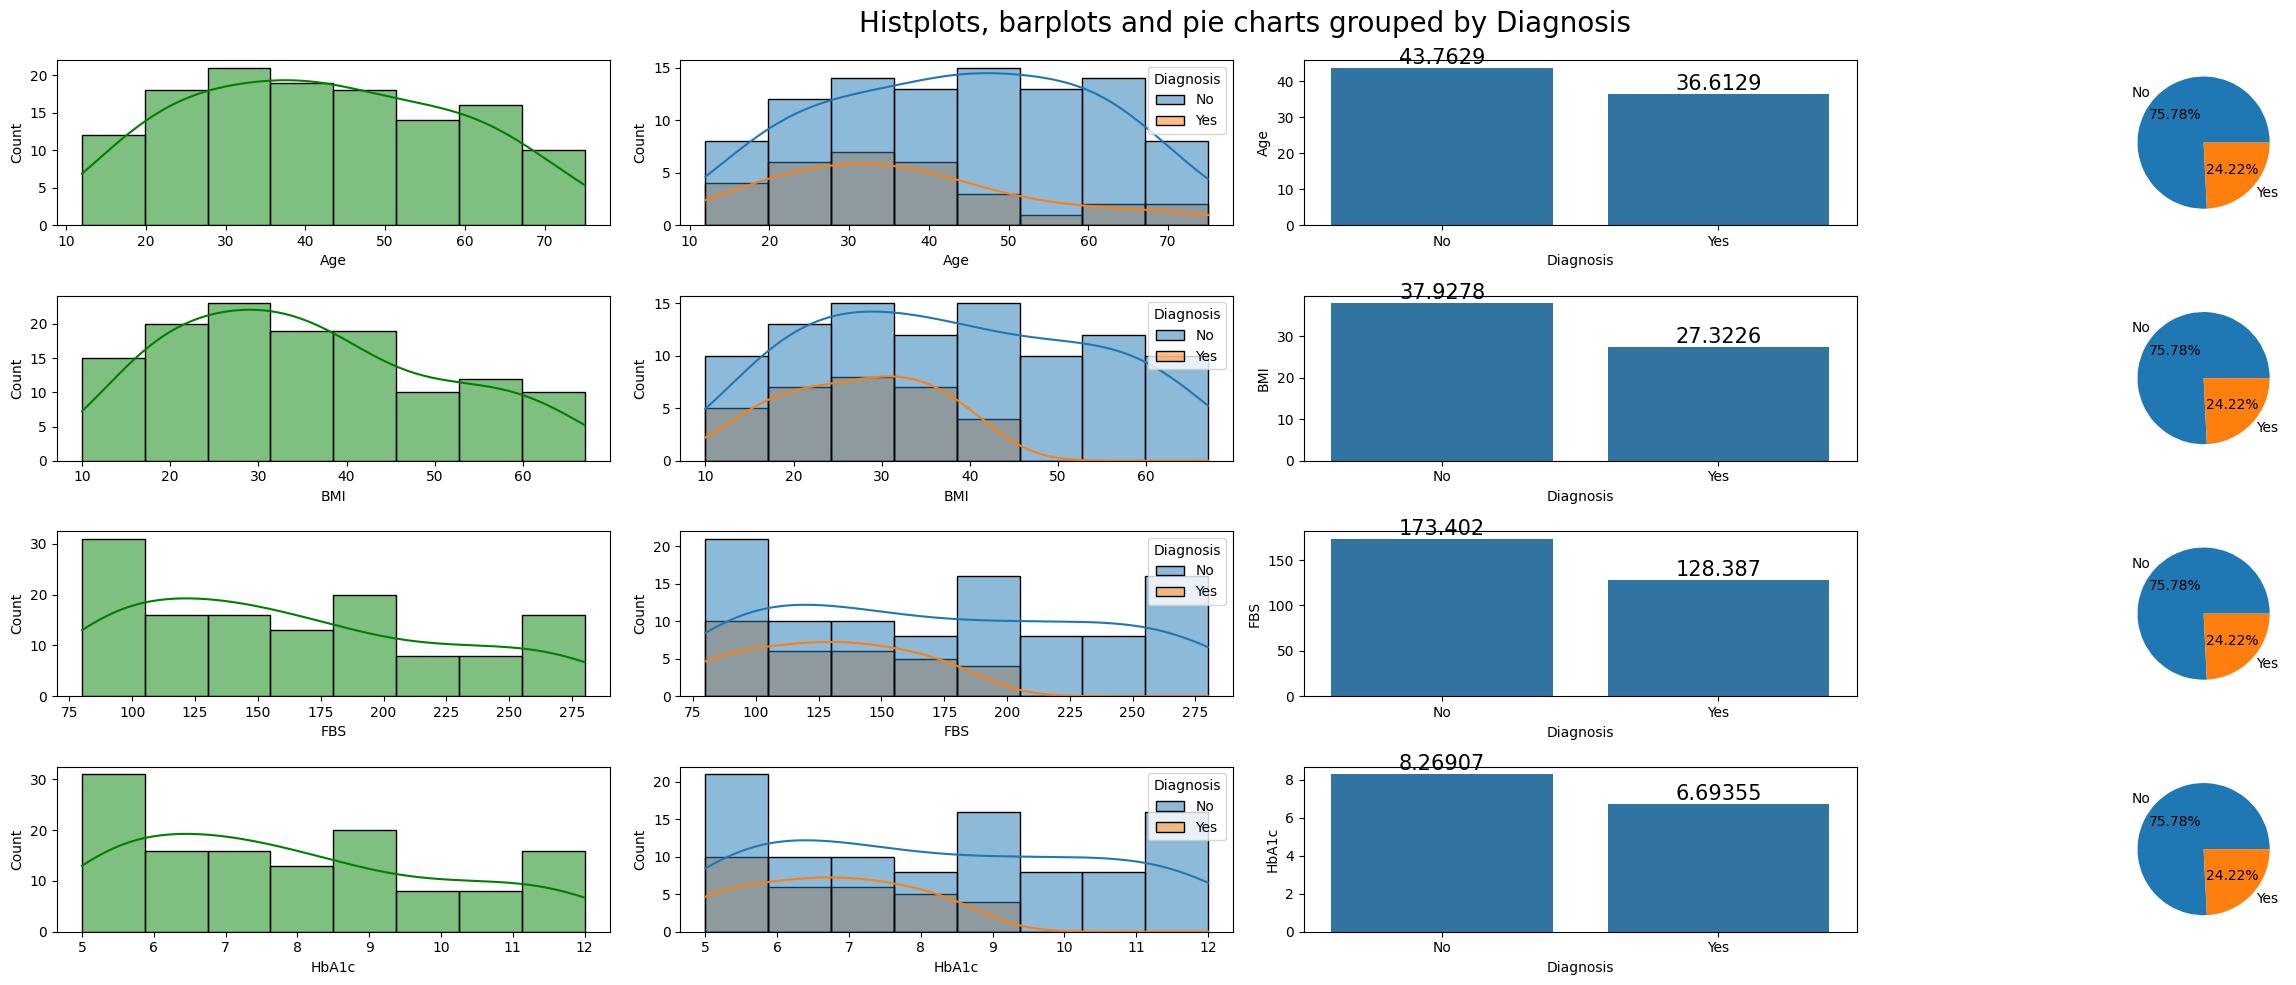

In [12]:
cats = ['Gender', 'Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise', 'Diagnosis']
nums = ['Age', 'BMI', 'FBS', 'HbA1c']

for c in cats:
    plot_class(df,c,nums)

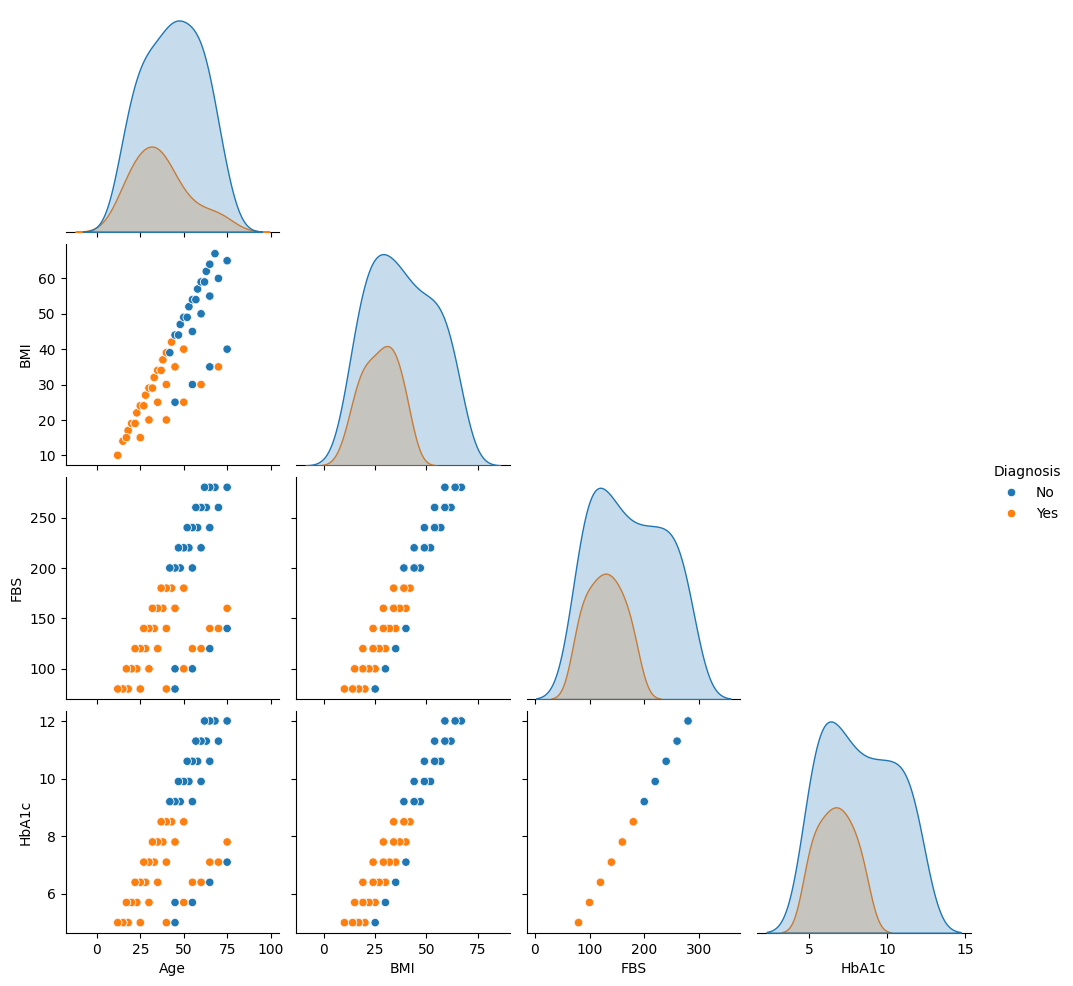

In [13]:
sns.pairplot(df,vars=nums,hue='Diagnosis',corner=True)

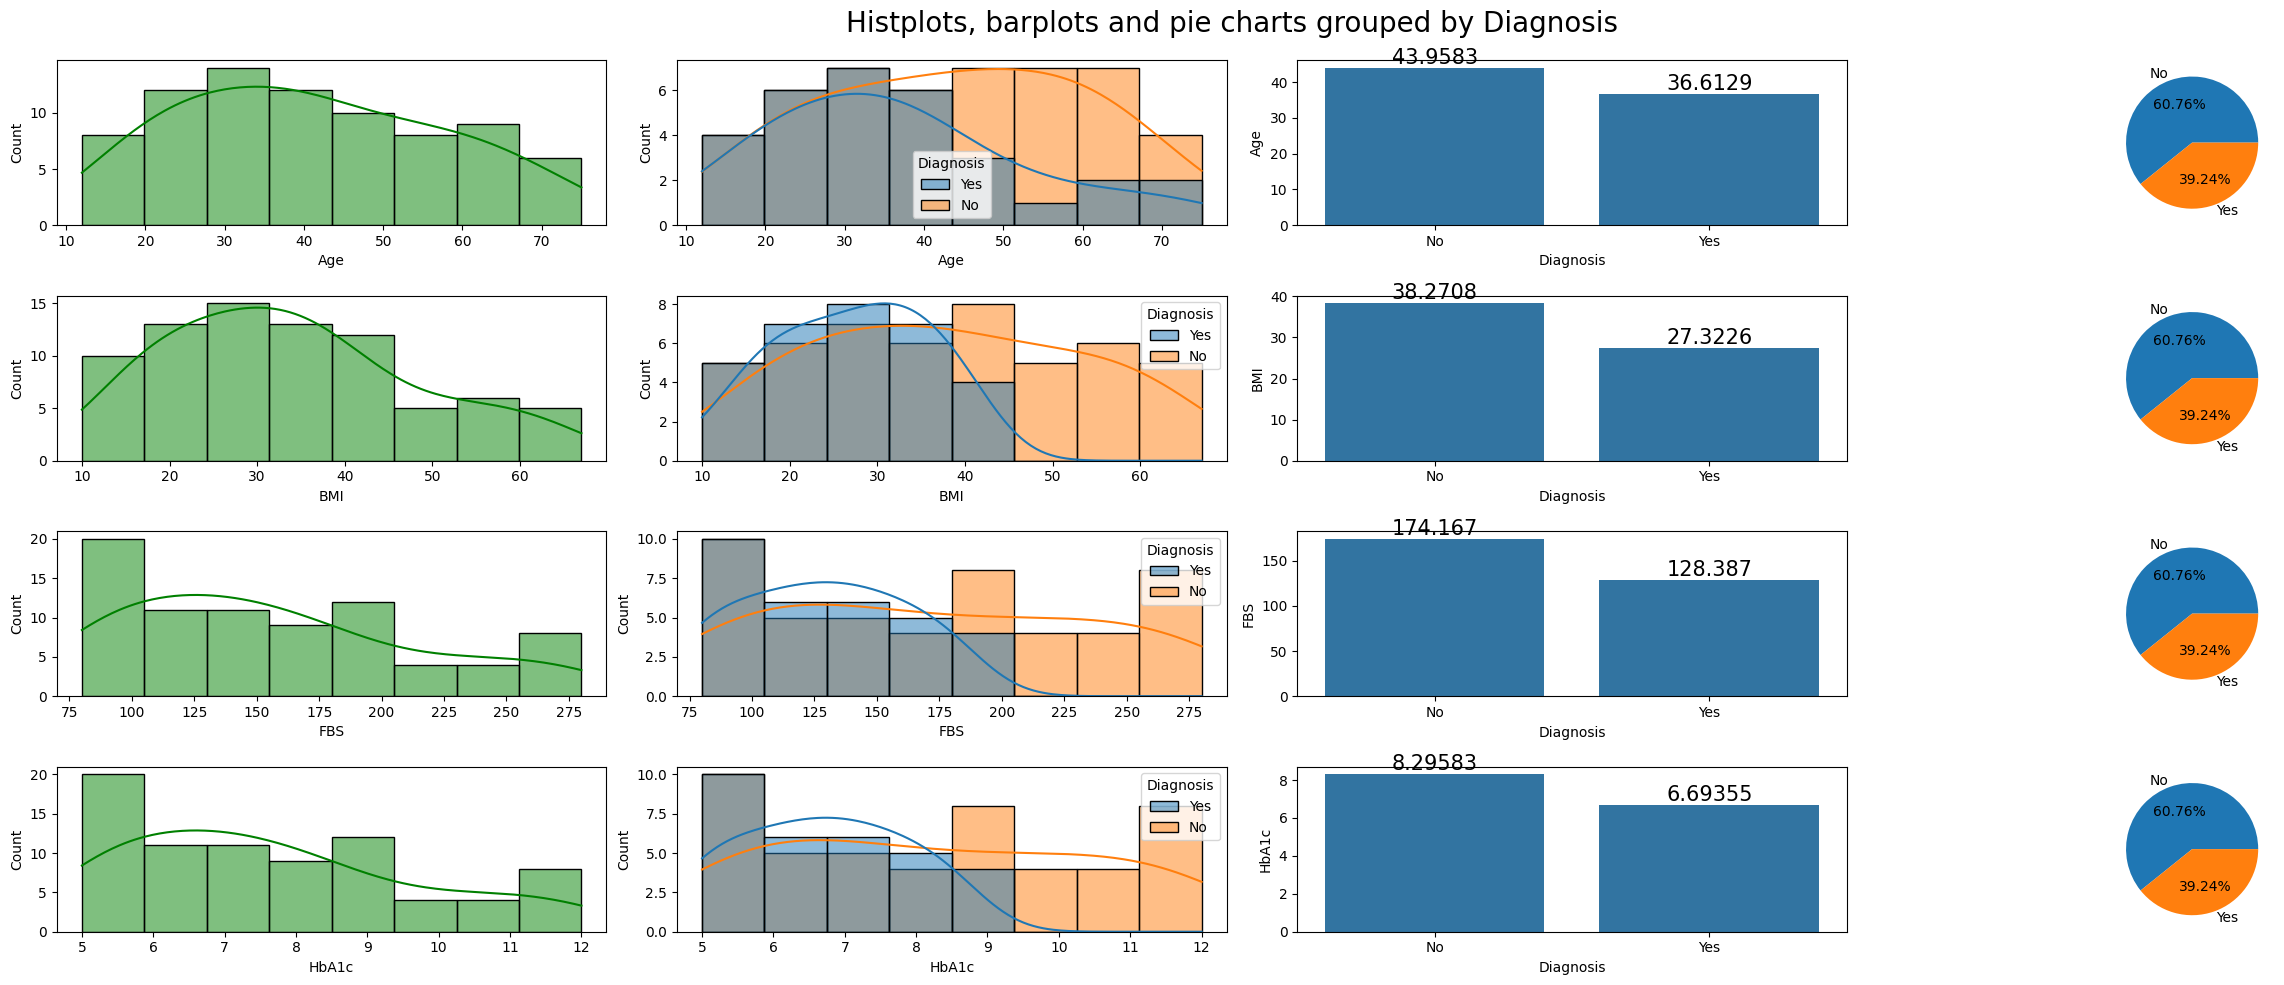

In [14]:
plot_class(df[df['Diet'] == 'Poor'],'Diagnosis',nums)

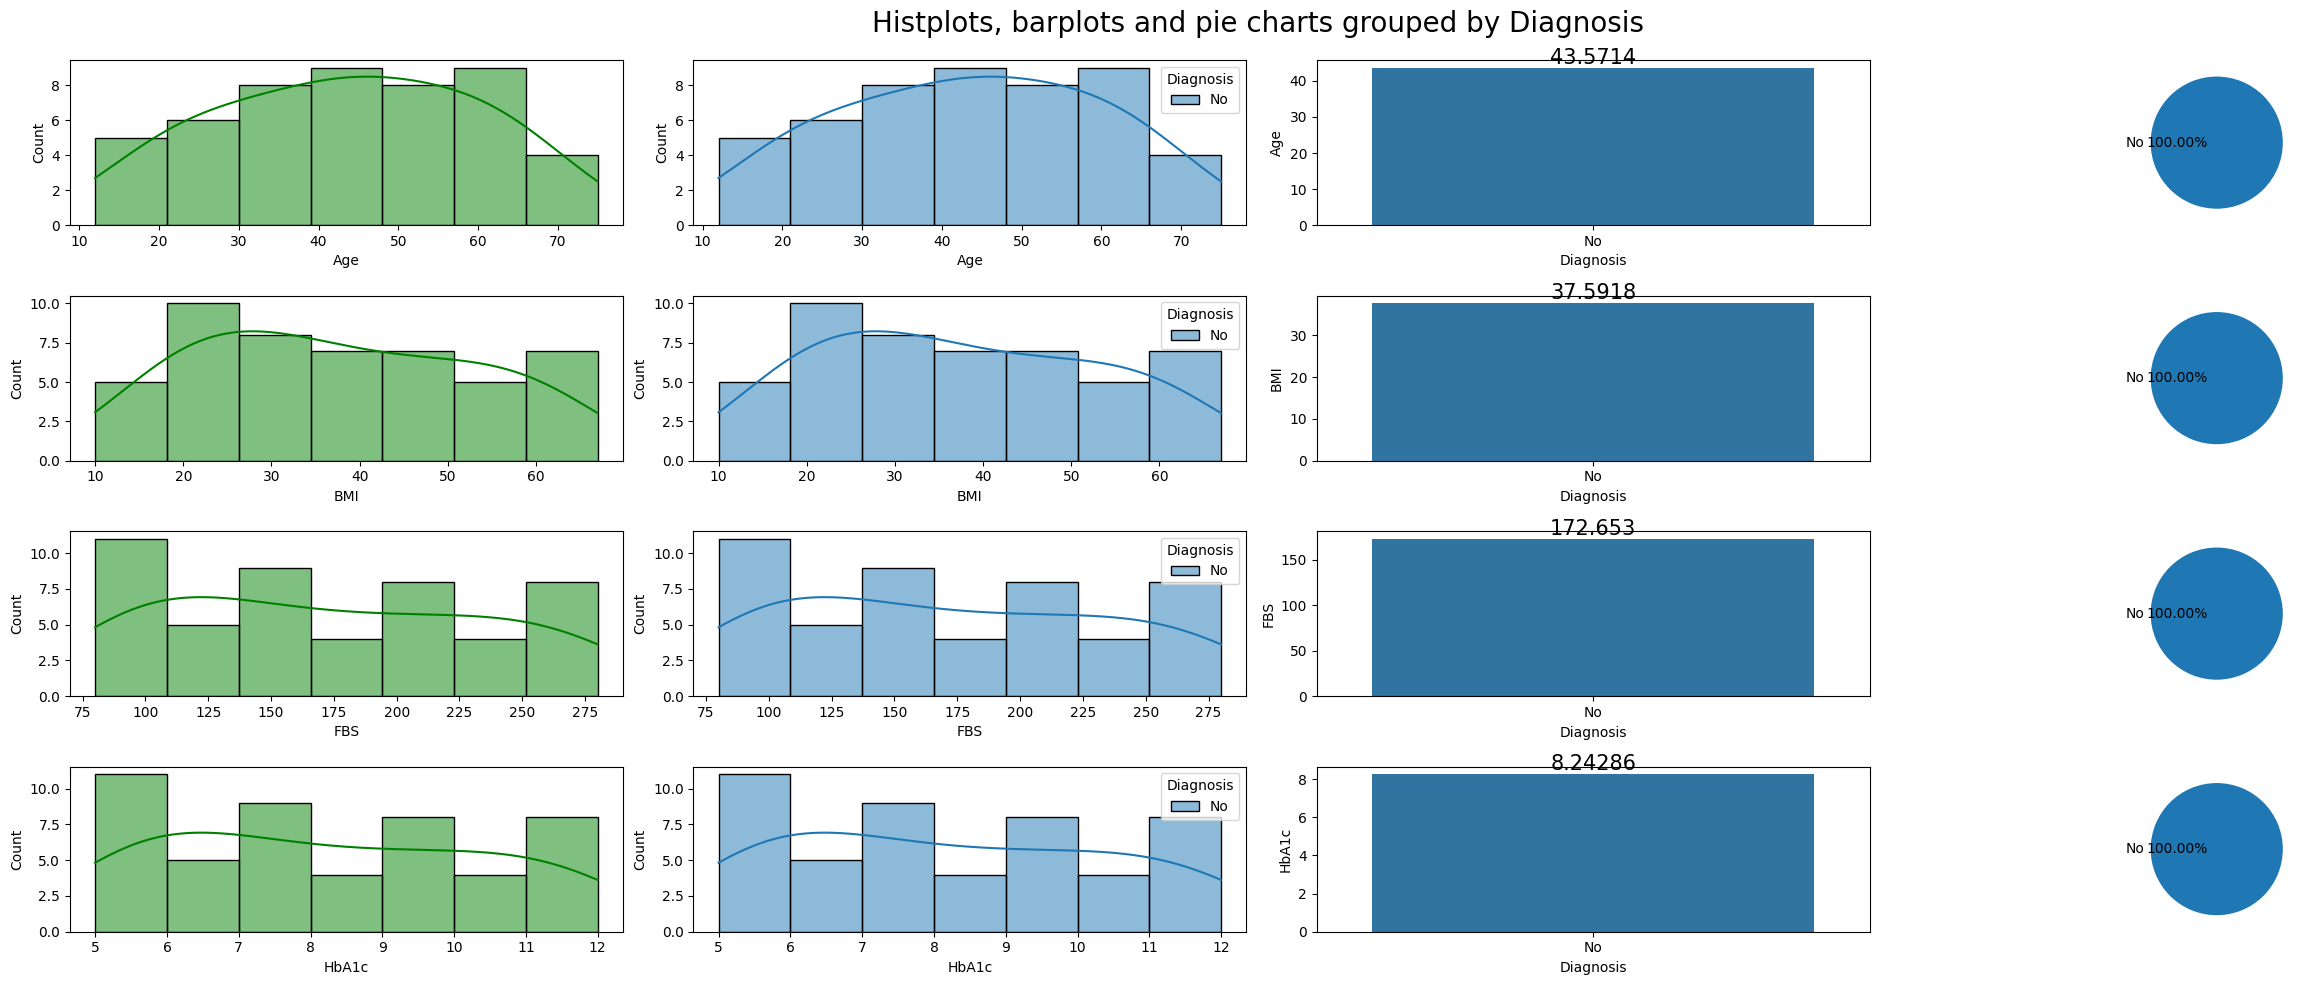

In [15]:
plot_class(df[df['Diet'] == 'Healthy'], 'Diagnosis',nums)

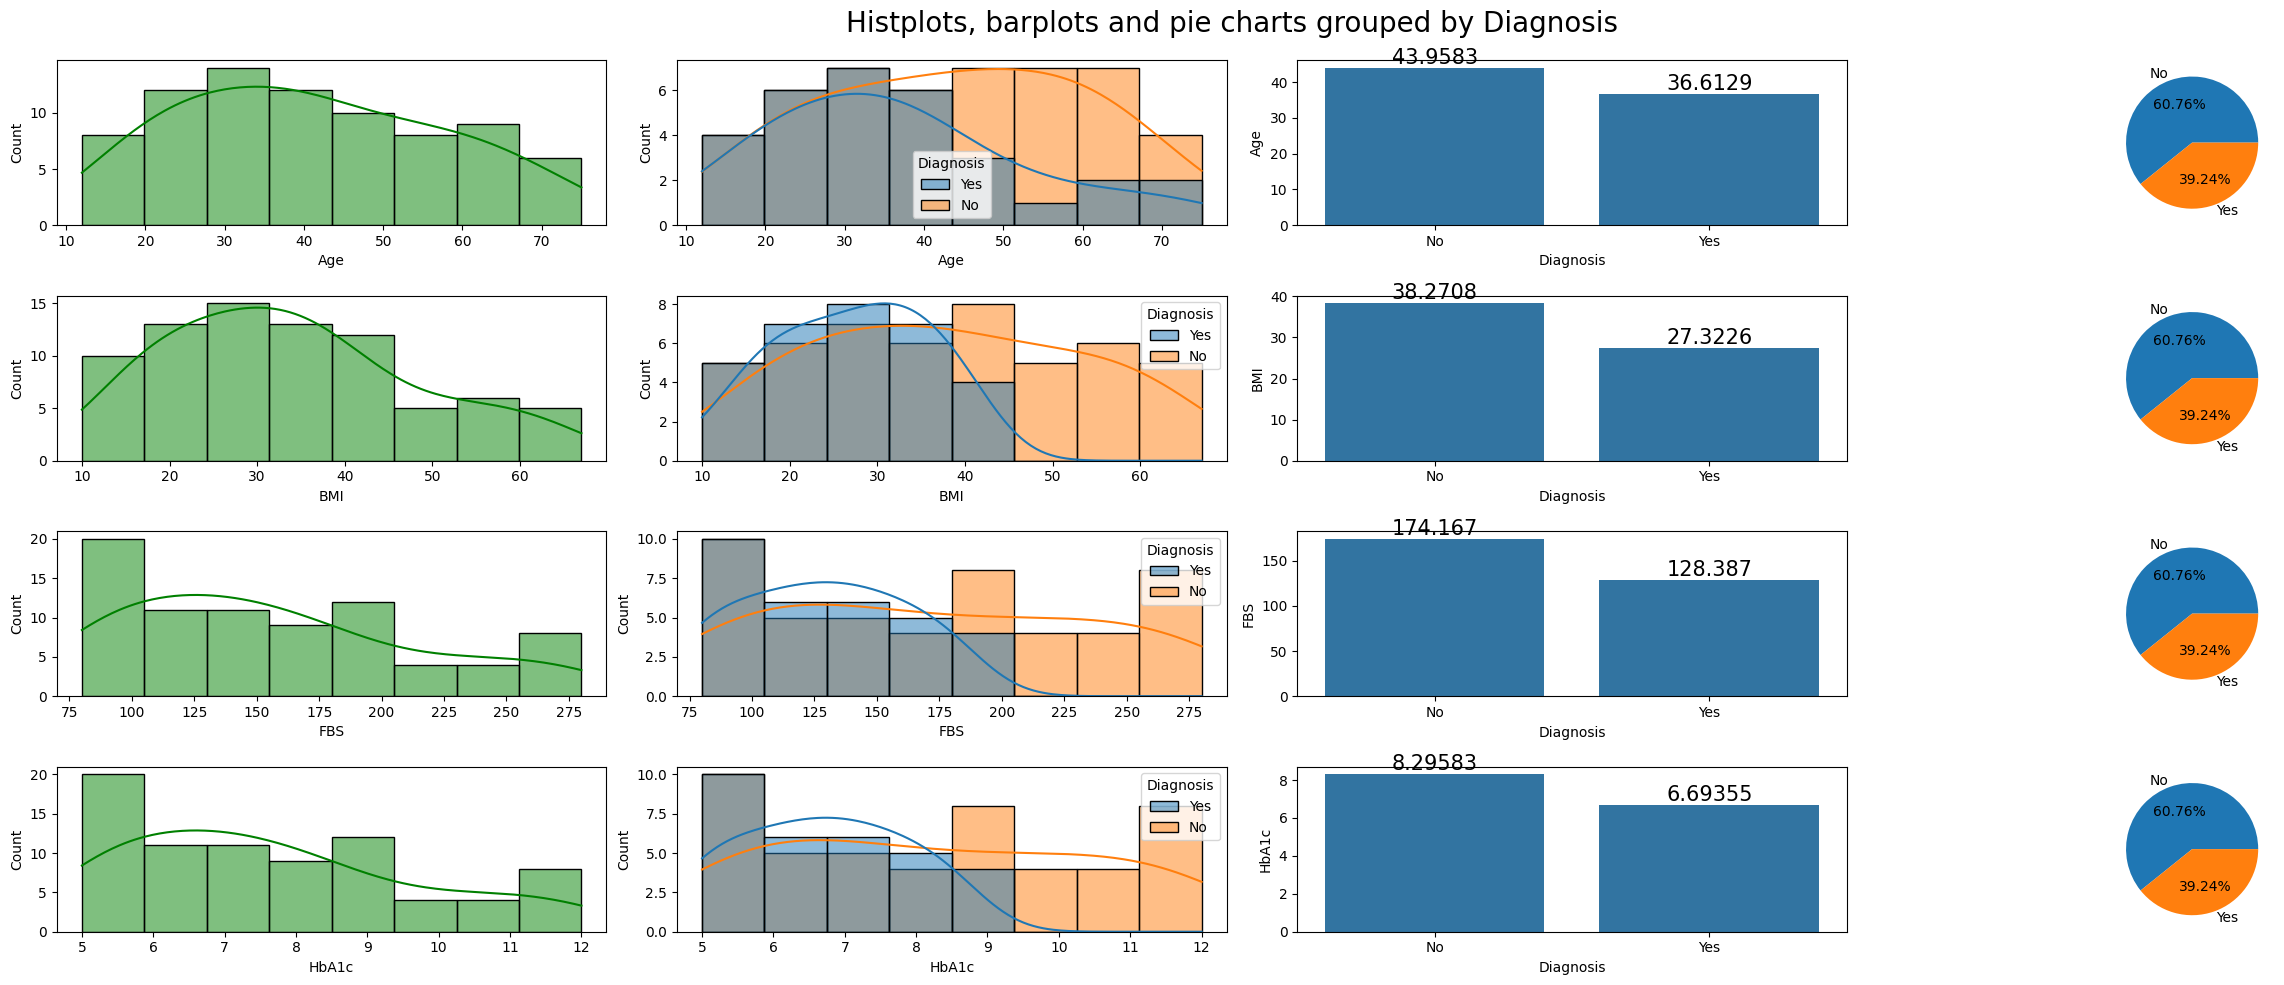

In [16]:
plot_class(df[df['Exercise'] == 'No'], 'Diagnosis',nums)

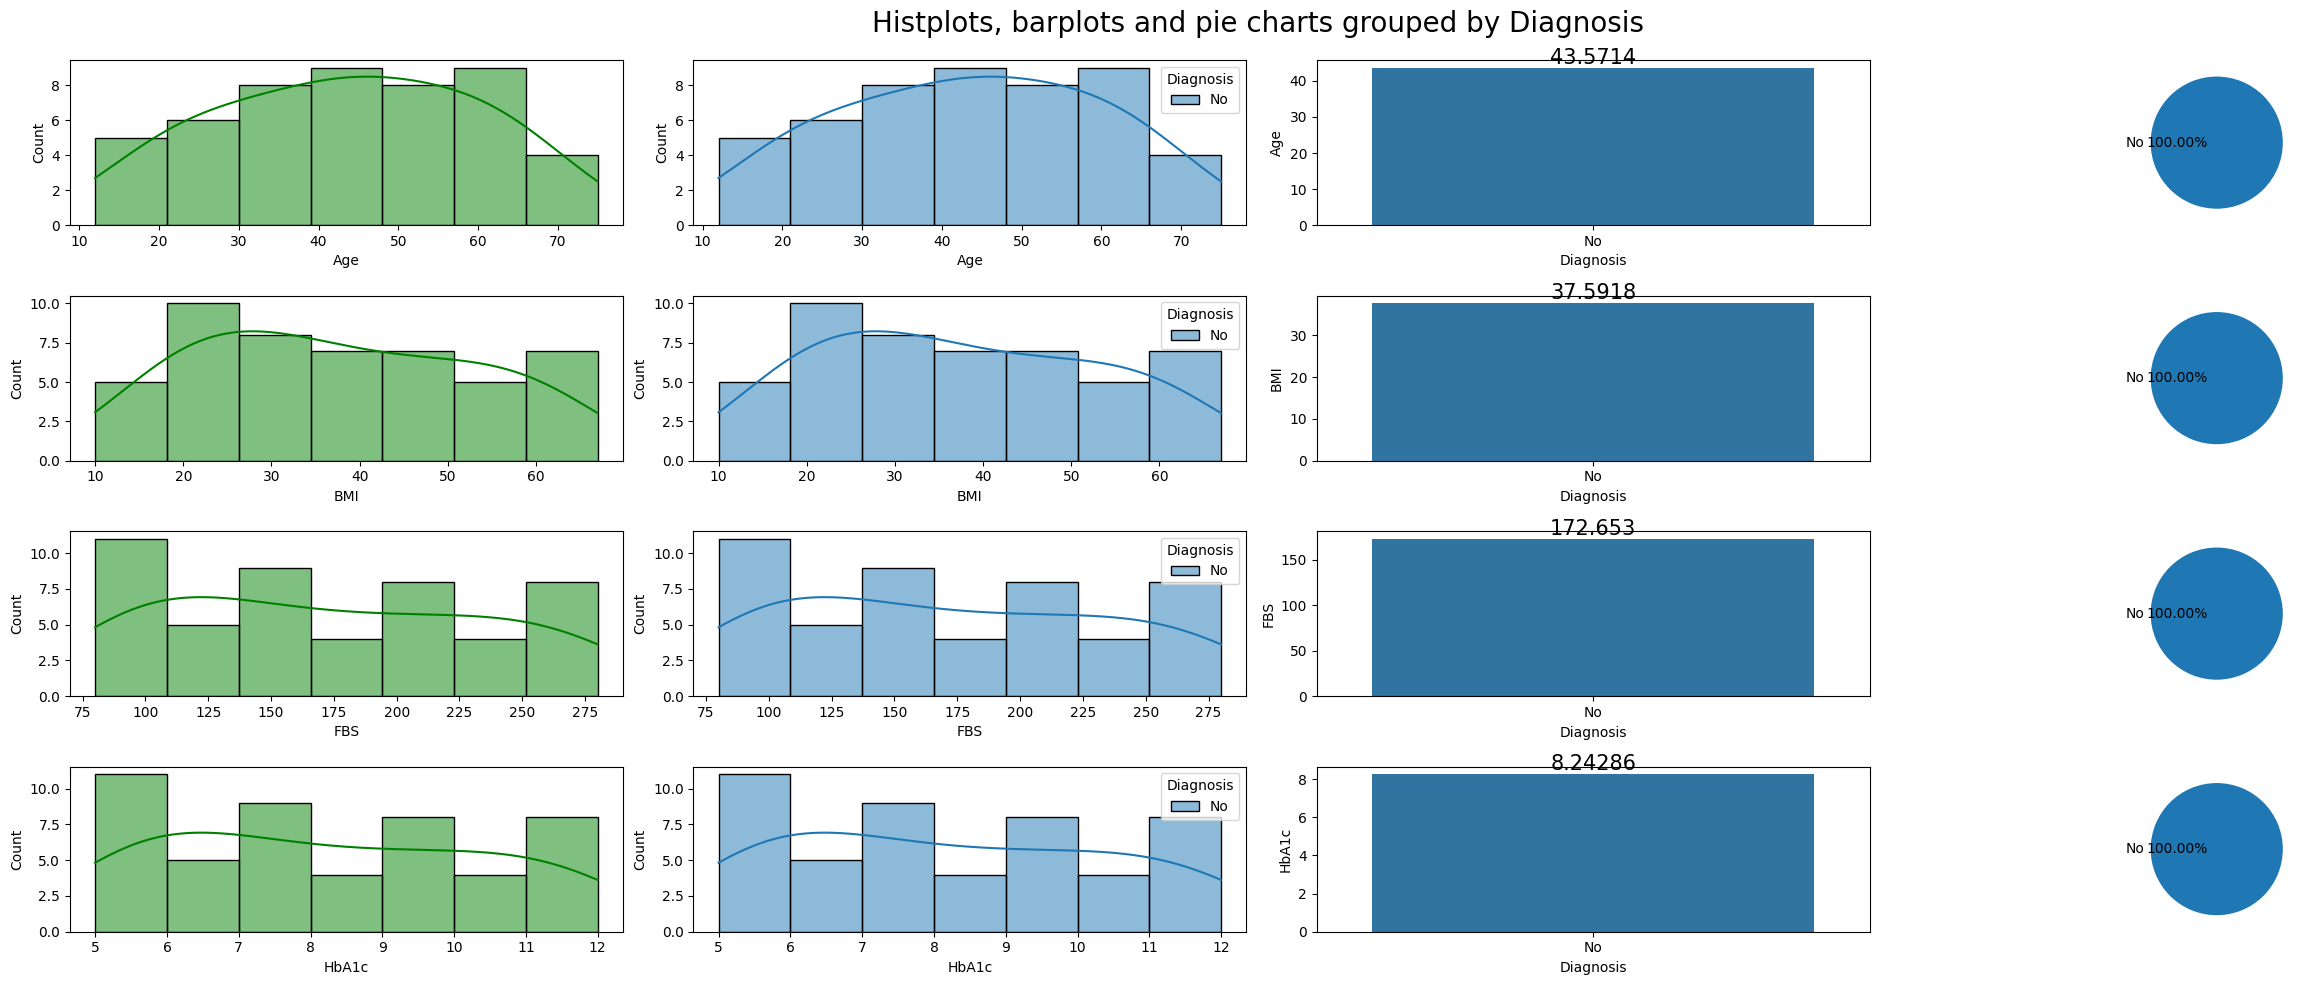

In [17]:
plot_class(df[df['Exercise'] == 'Regular'], 'Diagnosis',nums)

In [18]:
encoders = []
le = LabelEncoder()
for i in cats:
    df[i] = le.fit_transform(df[i])
    encoders += [le]

In [19]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

In [20]:
def evaluate(model, name, _round=2):
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_pred, y_test)
    acc *= 100
    acc = round(acc, _round)
    title = "{} : {}%".format(model, acc)
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, annot=True)
    plt.title(title)
    plt.show()

def training(model, name):
    model.fit(x_train, y_train)
    evaluate(model, name)
    return model

In [21]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.01)
rfc = RandomForestClassifier(n_estimators=110,max_depth=50)
dtc = DecisionTreeClassifier(max_depth=50)
knn = KNeighborsClassifier(n_neighbors=10)
svc = SVC(C=0.5,kernel='linear')
gnb = GaussianNB()
lgr = LogisticRegression()

models = [abc, rfc, dtc, knn, svc, gnb, lgr]
names = ['Ada Boost', 'Random Forest', 'Decision Tree', 'KNN', 'SVC', 'Naive Bayes', 'Logistic Regression']

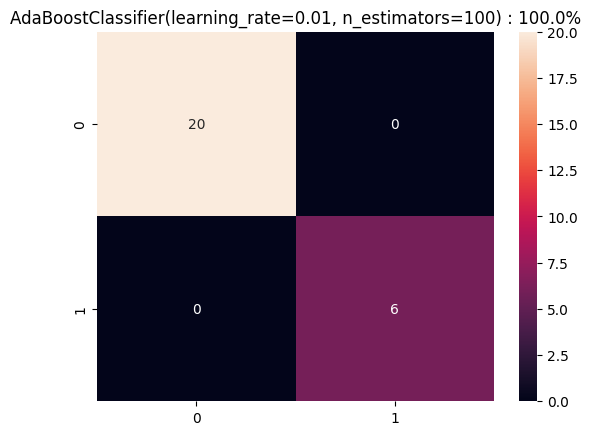

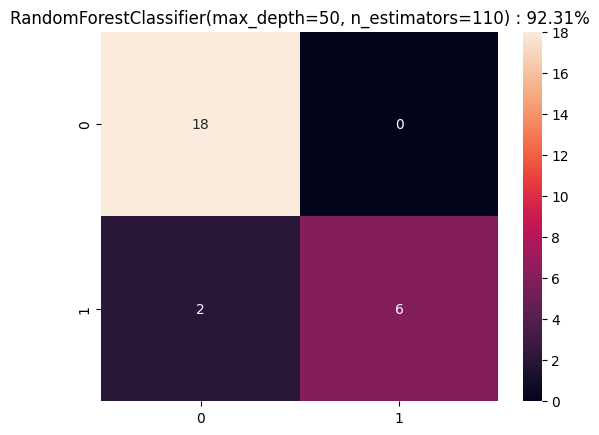

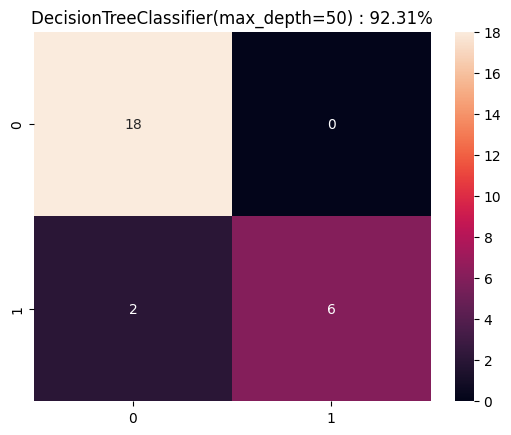

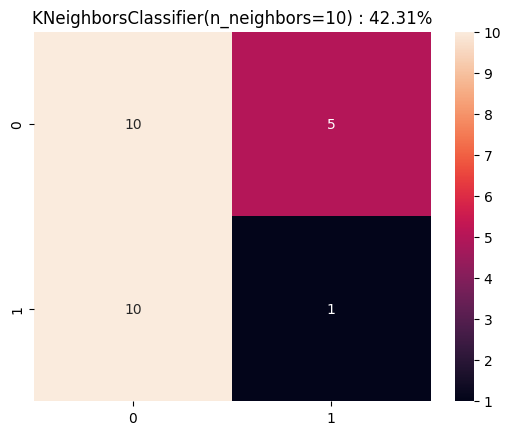

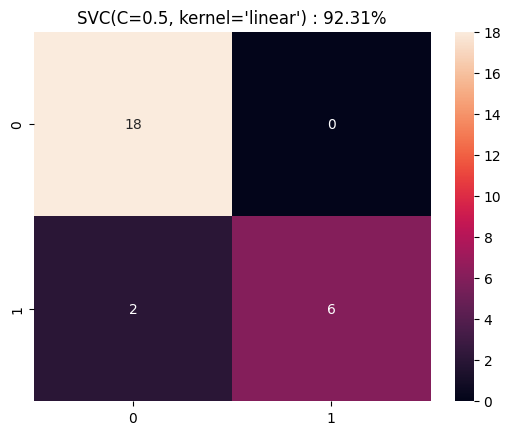

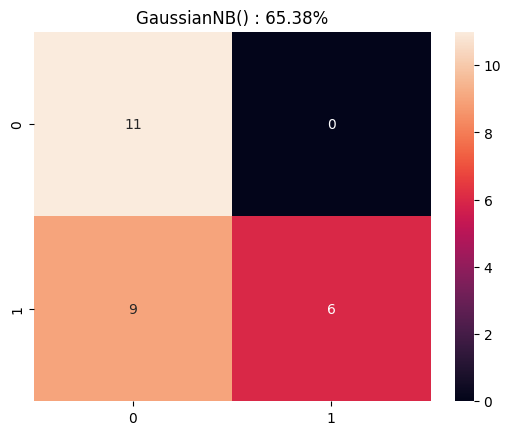

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


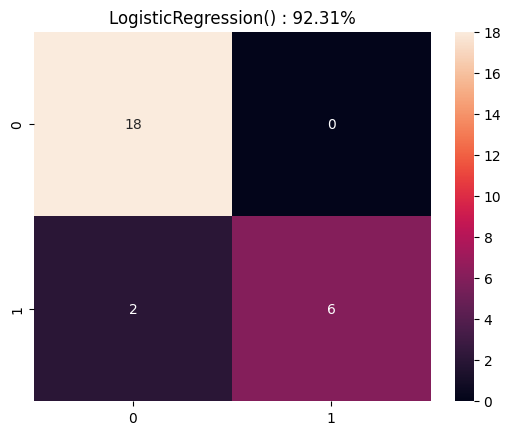

In [22]:
model_trained = []
for i, j in zip(models, names):
    training(i, j)

In [23]:
from joblib import dump

In [24]:
dump(models,'D:/MajorProjectDocLab/savedmodel/model.joblib')

['D:/MajorProjectDocLab/savedmodel/model.joblib']